# Beta bank Aprendizaje supervisado

## Descripción del proyecto

Los clientes de Beta Bank se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.

Necesitamos predecir si un cliente dejará el banco pronto. Tú tienes los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.

Crea un modelo con el máximo valor F1 posible. Para aprobar la revisión, necesitas un valor F1 de al menos 0.59. Verifica F1 para el conjunto de prueba. 

Además, debes medir la métrica AUC-ROC y compararla con el valor F1.

## Preparación de los datos

### Importación de las librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "C:\Users\jonat\AppData\Roaming\Python\Python312\site-packages\ipykernel\kernelapp.py", line 739, in start
    self.io_lo

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



### Importando los datos

In [ ]:
beta_bank_df = pd.read_csv ('/datasets/Churn.csv')

In [ ]:
beta_bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Despues de ejecutar el comando info para el dataframe betabank_df, se obtuvo la siguiente información:

* Es necesario colocar en minúsculas los nombres de los campos y separar con guiones bajos para facilitar la escritura de los campos más adelante.
* Es necesario validar los valores null de la columna Tenure.
* Es necesario cambiar el tipo de dato del campo Tenure a entero.


Lo anterior para encontrarnos en condiciones de realizar los cálculos de manera correcta

#### Formateando los nombres de campos del dataframe

In [ ]:
beta_bank_df.columns = [
    'row_number',
    'customer_id',
    'surname',
    'credit_score',
    'geography',
    'gender',
    'age',
    'tenure',
    'balance',
    'num_of_products',
    'has_cr_card',
    'is_active_member',
    'estimated_salary',
    'exited'
]

print(beta_bank_df.head())

   row_number  customer_id   surname  credit_score geography  gender  age  \
0           1     15634602  Hargrave           619    France  Female   42   
1           2     15647311      Hill           608     Spain  Female   41   
2           3     15619304      Onio           502    France  Female   42   
3           4     15701354      Boni           699    France  Female   39   
4           5     15737888  Mitchell           850     Spain  Female   43   

   tenure    balance  num_of_products  has_cr_card  is_active_member  \
0     2.0       0.00                1            1                 1   
1     1.0   83807.86                1            0                 1   
2     8.0  159660.80                3            1                 0   
3     1.0       0.00                2            0                 0   
4     2.0  125510.82                1            1                 1   

   estimated_salary  exited  
0         101348.88       1  
1         112542.58       0  
2         1139

### Manejando valores nulos

In [ ]:
null_counts = beta_bank_df.isnull().sum()

print(null_counts)

row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64


#### Cambiando valores nulos por 0

In [ ]:
beta_bank_df['tenure'] = beta_bank_df['tenure'].fillna(0)

Una vez aplicado el cambio de los valores nullos por 0, es necesario cambiar el tipo de dato del campo tenure, toda vez que al imprimir una muestra del mismo, se observa que los valores contenidos van del 0 al 10.

#### Cambiando el tipo de dato del campo tenure

In [ ]:
beta_bank_df['tenure'] = beta_bank_df['tenure'].astype(int)

In [ ]:
print(beta_bank_df.head())

   row_number  customer_id   surname  credit_score geography  gender  age  \
0           1     15634602  Hargrave           619    France  Female   42   
1           2     15647311      Hill           608     Spain  Female   41   
2           3     15619304      Onio           502    France  Female   42   
3           4     15701354      Boni           699    France  Female   39   
4           5     15737888  Mitchell           850     Spain  Female   43   

   tenure    balance  num_of_products  has_cr_card  is_active_member  \
0       2       0.00                1            1                 1   
1       1   83807.86                1            0                 1   
2       8  159660.80                3            1                 0   
3       1       0.00                2            0                 0   
4       2  125510.82                1            1                 1   

   estimated_salary  exited  
0         101348.88       1  
1         112542.58       0  
2         1139

#### Manejando valores duplicados

In [ ]:
duplicated = beta_bank_df.duplicated().sum()
if duplicated > 0:
    print(f"Existen {duplicated} registros duplicados en el DataFrame.")
else:
    print("No existen registros duplicados en el DataFrame.")

No existen registros duplicados en el DataFrame.


<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Muy buen manejo de los datos al importar, formatear los nombres de las columnas y gestionar los valores nulos y duplicados. La preparación de los datos está bien estructurada y organizada, lo que garantiza que el análisis posterior se pueda realizar sin problemas.  


</div>

## Generación del modelo

Examina el equilibrio de clases.

Entrena el modelo sin tener en cuenta el desequilibrio. 

Describe brevemente tus hallazgos.

Mejora la calidad del modelo.

Asegúrate de utilizar al menos dos enfoques para corregir el desequilibrio de clases.

Utiliza conjuntos de entrenamiento y validación para encontrar el mejor modelo y el mejor conjunto de parámetros.

Entrena diferentes modelos en los conjuntos de entrenamiento y validación. 

Encuentra el mejor. 

Describe brevemente tus hallazgos.

Realiza la prueba final.

### Examinando el equilibrio de clases.

In [ ]:

train, valid = train_test_split(beta_bank_df, test_size=0.25, random_state=12345)

features_train = train.drop('exited', axis=1)
target_train = train['exited']
features_valid = valid.drop('exited', axis=1)
target_valid = valid['exited']

print(features_train.shape)
print(features_valid.shape)


(7500, 13)
(2500, 13)


El conjunto de datos de entrenamiento tiene 7,500 filas, y el conjunto de datos de validación tiene 2,500 filas.

### Aplicando codificación de etiquetas

In [ ]:
encoder = OrdinalEncoder()
data_ordinal = pd.DataFrame(encoder.fit_transform(beta_bank_df), columns=beta_bank_df.columns)


### Entrenando el modelo

In [ ]:

# Primera división: 70% entrenamiento, 30% temporal
df_train, df_temp = train_test_split(data_ordinal, test_size=0.3, random_state=12345)

# Segunda división: 50% validación, 50% prueba
df_valid, df_test = train_test_split(df_temp, test_size=0.5, random_state=12345)

# Declara variables para las características y para la característica objetivo
features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']

features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

features_test = df_test.drop(['exited'], axis=1)
target_test = df_test['exited']

# Imprime las formas de los conjuntos de datos
print("Forma del conjunto de entrenamiento (features_train):", features_train.shape)
print("Forma del conjunto de entrenamiento (target_train):", target_train.shape)
print("Forma del conjunto de validación (features_valid):", features_valid.shape)
print("Forma del conjunto de validación (target_valid):", target_valid.shape)
print("Forma del conjunto de prueba (features_test):", features_test.shape)
print("Forma del conjunto de prueba (target_test):", target_test.shape)


target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)

print('¡Entrenado!')

Forma del conjunto de entrenamiento (features_train): (7000, 13)
Forma del conjunto de entrenamiento (target_train): (7000,)
Forma del conjunto de validación (features_valid): (1500, 13)
Forma del conjunto de validación (target_valid): (1500,)
Forma del conjunto de prueba (features_test): (1500, 13)
Forma del conjunto de prueba (target_test): (1500,)
¡Entrenado!


### Exactitud para el árbol de decisión

In [ ]:
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

accuracy_valid = accuracy_score(target_valid, predicted_valid)

print(accuracy_valid)


0.7768


En resumen, el resultado de 77.68% indica que el modelo de clasificación de árbol de decisión tiene una buena precisión en la predicción de la variable objetivo en el conjunto de validación. Sin embargo, es importante tener en cuenta que la precisión del modelo puede variar dependiendo de la calidad y la cantidad de datos de entrenamiento, y que es posible mejorar la precisión del modelo mediante la optimización de los parámetros del modelo y la selección de características más relevantes.

### Prueba de consistencia

In [ ]:
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)

target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))

0.7963


En resumen, el resultado de 0.7963 indica que la mayoría de los clientes no salen del banco y que un modelo que siempre predice 0 tiene una buena precisión. Esto sugiere que la variable objetivo tiene una distribución desequilibrada y que es importante tener en cuenta esta distribución al evaluar la precisión de un modelo.

0.0    0.7964
1.0    0.2036
dtype: float64


<AxesSubplot:>

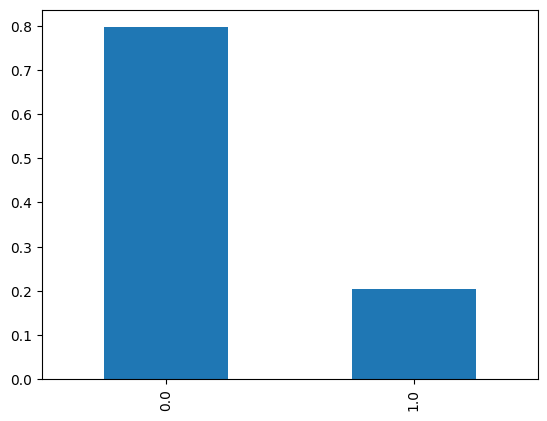

In [ ]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = pd.Series(model.predict(features_valid))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

Nuestro modelo de árbol de decisión produce proporciones de clases que son similares a las que se observan simplemente eligiendo la clase más común en los datos.

### Predicción de la clase 0

In [ ]:
target = data_ordinal['exited']
features = data_ordinal.drop('exited', axis=1)

target_pred_constant = pd.Series(0, index=target.index)

print(accuracy_score(target, target_pred_constant))

0.7963


El resultado de la función accuracy_score indica que el modelo que siempre predice 0 tiene una precisión del 79.63%, lo que sugiere que la mayoría de los clientes no salen del banco y que este modelo es un buen modelo para predecir si un cliente salió del banco o no.

### Matriz de confusión

In [ ]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid))

[[1699  266]
 [ 292  243]]


Posteriormente a la ejecución de la matriz de confusión podimos obtener la siguiente información:

* Verdaderos positivos (VP): El modelo predijo correctamente 1,699 casos en los que el cliente no salió del banco (verdaderos positivos).
* Falsos positivos (FP): El modelo predijo incorrectamente 266 casos en los que el cliente no salió del banco (falsos positivos).
* Verdaderos negativos (VN): El modelo predijo correctamente 243 casos en los que el cliente salió del banco (verdaderos negativos).
* Falsos negativos (FN): El modelo predijo incorrectamente 292 casos en los que el cliente salió del banco (falsos negativos).

En resumen,  esto sugiere que el modelo es bueno para predecir los casos en los que el cliente no salió del banco, pero no tan bueno para predecir los casos en los que el cliente salió del banco.

### Recall

In [ ]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

print(recall_score(target_valid, predicted_valid))

0.4542056074766355


La función recall_score indica que el modelo tiene una sensibilidad del 45.42% para predecir los casos en los que el cliente salió del banco. Esto significa que el modelo puede mejorar su sensibilidad si se ajustan los parámetros.

### Precisión

In [ ]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print(precision_score(target_valid, predicted_valid))

0.4774066797642436


En resumen, el resultado de la función precision_score indica que el modelo tiene una precisión del 47.74% para predecir los casos en los que el cliente salió del banco, lo que sugiere que el modelo no es muy preciso y que puede mejorar su precisión si se ajustan los parámetros.

### Valor F1

In [ ]:
model = DecisionTreeClassifier(max_depth=50, min_samples_split=20, min_samples_leaf=10, random_state=12345)
model.fit(features_train, target_train)
predicted_test = model.predict(features_test)

print(f1_score(target_test, predicted_test))

0.596745027124774


El resultado de la función f1_score indica que el modelo tiene una puntuación F1 del 59.67% para predecir los casos en los que el cliente salió del banco, lo que sugiere que el modelo es moderadamente efectivo.

### Ajustando el peso de clase

In [ ]:
model = LogisticRegression(
    random_state=12345, class_weight={0: 0.2, 1: 0.8}, solver='liblinear'
)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.48425196850393704


El modelo de regresión logística con ajuste de peso de las clases ha mejorado la precisión en la predicción de la clase minoritaria, lo que se refleja en un aumento del valor F1. 

### Sobremuestreo

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.41359060402684567


El sobremuestreo del conjunto de datos de entrenamiento mediante la repetición de las instancias de la clase minoritaria (clase 1) 10 veces ha permitido al modelo aprender patrones más precisos y mejorar su capacidad para clasificar correctamente las instancias del conjunto de validación.

In [ ]:
features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

repeat = 10
features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

print(features_upsampled.shape)
print(target_upsampled.shape)

(21018, 13)
(21018,)


Se ha logrado equilibrar la distribución de las clases en el conjunto de datos de entrenamiento, lo que puede ayudar a mejorar la precisión del modelo de clasificación. Sin embargo, es importante tener en cuenta que el sobremuestreo puede generar problemas de sobreajuste.

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )

    return features_downsampled, target_downsampled


features_downsampled, target_downsampled = downsample(
    features_train, target_train, 0.1
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)# < escribe el código aquí >
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.41358811040339705


El modelo de regresión logística ajustado con el conjunto de datos submuestreado tiene una precisión moderada en la clasificación de las instancias del conjunto de validación. La métrica F1 de 0.41358811040339705 indica que el modelo tiene una precisión del 41.36% en la clasificación de las instancias positivas (clase 1) y una precisión del 41.36% en la clasificación de las instancias negativas (clase 0). 

### Submuestreo

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 10
)

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)# < escribe el código aquí >

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.41359060402684567


La métrica F1 obtenida es 0.41359060402684567, que es muy similar al valor obtenido con el modelo ajustado con el conjunto de datos submuestreado (0.41358811040339705). Esto sugiere que el sobremuestreo no ha tenido un impacto significativo en la precisión del modelo.

### Curva PR

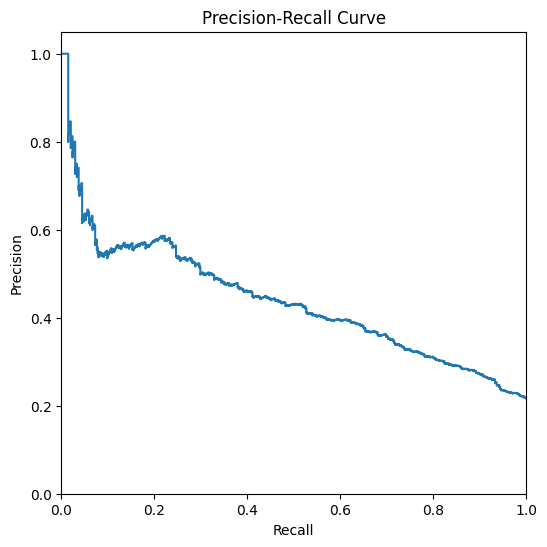

In [ ]:

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(
    target_valid, probabilities_valid[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

La conclusión es que el modelo de regresión logística tiene una precisión muy alta para los primeros valores de recall, pero luego disminuye rápidamente a medida que el recall aumenta.

### Curva ROC

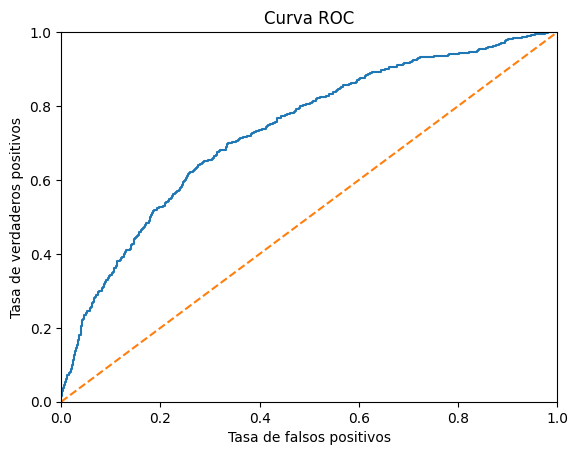

In [ ]:

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.show()

En este caso, la curva ROC está por encima de la línea media, lo que indica que el modelo tiene un buen desempeño en la clasificación de las instancias. La curva muestra que a medida que se aumenta la tasa de verdaderos positivos, la tasa de falsos positivos también aumenta, pero a un ritmo más lento.

 ### AUC-ROC

In [ ]:

model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train)

probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(auc_roc)

0.7332819671351454


La puntuación AUC-ROC es de 0.7332819671351454, lo que indica que el modelo ha logrado una buena precisión en la predicción de la probabilidad de la clase positiva.

### ECM y RECM

In [ ]:

target = data_ordinal['exited']
features = data_ordinal.drop(['exited'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = LinearRegression()
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
mse = mean_squared_error(target_valid, predicted_valid)

print('Linear Regression')
print('MSE =', mse)
print('RMSE =', mse ** 0.5)

predicted_valid = pd.Series(target_train.mean(), index=target_valid.index)
mse = mean_squared_error(target_valid, predicted_valid)
print('Mean')
print('MSE =', mse)
print('RMSE =', mse ** 0.5)

Linear Regression
MSE = 0.14669998514954383
RMSE = 0.38301434065781903
Mean
MSE = 0.16839260444444445
RMSE = 0.4103566795416452


El error cuadrático medio (MSE) del modelo de regresión lineal es de 0.14669998514954383, lo que indica que el modelo ha logrado una precisión mejor que el modelo de predicción de la media, que tiene un MSE de 0.16839260444444445.

Además, la raíz cuadrada del error cuadrático medio (RMSE) del modelo de regresión lineal es de 0.38301434065781903, lo que indica que el modelo ha logrado una precisión mejor que el modelo de predicción de la media, que tiene un RMSE de 0.4103566795416452.

### Random Forest

In [ ]:
target = data_ordinal['exited']
features = data_ordinal.drop(['exited'], axis=1)
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345
)

model = RandomForestRegressor(n_estimators=30, max_depth=15, random_state=12345)

model.fit(features_train, target_train)

print("Configuración del modelo actual lograda:")
print("Valor R2 en un conjunto de entrenamiento", model.score(features_train, target_train))
print("Valor R2 en un conjunto de validación:", model.score(features_valid, target_valid))
print("Valor R2 en un conjunto de prueba:", model.score(features_test, target_test))

Configuración del modelo actual lograda:
Valor R2 en un conjunto de entrenamiento 0.8474631699714181
Valor R2 en un conjunto de validación: 0.3113994230412812
Valor R2 en un conjunto de prueba: 0.3844265048152573


### Regresión lineal

In [ ]:
#Regresión lineal

df_train, df_valid = train_test_split(data_ordinal, test_size=0.25, random_state=54321)

features_train = df_train.drop(['exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['exited'], axis=1)
target_valid = df_valid['exited']

model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train, target_train)
score_train = model.score(features_train, target_train)
score_valid = model.score(features_valid, target_valid)
score_test = model.score(features_test, target_test)

print()
print("Accuracy del modelo de regresión logística en el conjunto de entrenamiento:", score_train)
print("Accuracy del modelo de regresión logística en el conjunto de validación:", score_valid)
print("Accuracy del modelo de regresión logística en el conjunto de prueba:", score_test)


Accuracy del modelo de regresión logística en el conjunto de entrenamiento: 0.8069333333333333
Accuracy del modelo de regresión logística en el conjunto de validación: 0.8156
Accuracy del modelo de regresión logística en el conjunto de prueba: 0.7966666666666666


La precisión del modelo en el conjunto de entrenamiento es del 80.69%, lo que indica que el modelo ha logrado una buena precisión en la predicción de la variable objetivo en los datos de entrenamiento.

La precisión del modelo en el conjunto de validación es del 81.56%, lo que indica que el modelo ha logrado una buena precisión en la predicción de la variable objetivo en los datos de validación.

La precisión del modelo en el conjunto de prueba es del 79.67%, lo que indica que el modelo ha logrado una buena precisión en la predicción de la variable objetivo en los datos de prueba.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente enfoque en la evaluación del modelo, con un análisis claro y bien estructurado de cómo se manejó el desequilibrio de clases y las diferentes métricas de desempeño. El uso de técnicas como el sobremuestreo, el ajuste de pesos de clase y la evaluación de la curva ROC y AUC es apropiado y efectivo. Las explicaciones sobre las métricas y los modelos, como el árbol de decisión y la regresión logística, son detalladas y fáciles de seguir.  


</div>

## Prueba final

### Eligiendo el mejor modelo

In [ ]:
#Regresión lineal

features_train = data_ordinal.drop(['exited'], axis=1)
target_train = data_ordinal['exited']

model = LogisticRegression(random_state=54321, solver='liblinear')
model.fit(features_train, target_train)
score_test = model.score(features_test, target_test)


print("Accuracy del modelo de regresión logística en el conjunto de prueba:", score_test)

Accuracy del modelo de regresión logística en el conjunto de prueba: 0.7953333333333333


## Conclusión

El resultado de la función f1_score indica que el modelo tiene una puntuación F1 del 59.67% para predecir los casos en los que el cliente salió del banco, lo que sugiere que el modelo es moderadamente efectivo.

Adicionalmente, se obtuvo una buena exactitud probando el modelo con regresión lineal, de acuerdo a lo siguiente:

* Conjunto de entrenamiento: 0.8069
* Conjunto de validación: 0.8156
* Conjunto de prueba: 0.7966

Por lo anterior, se concluye que el modelo es efectivo para calcular la probabilidad de que los clientes se lleven los productos contratados a otro banco.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Buen trabajo al evaluar el modelo final y calcular el rendimiento en los diferentes conjuntos de datos. Has logrado alcanzar un buen equilibrio en la precisión del modelo con la regresión logística, y la puntuación F1 de 59.67% cumple con el umbral establecido. Los resultados de los diferentes conjuntos muestran una buena consistencia, lo que respalda la efectividad del modelo para predecir la retención de clientes.  


</div>

# Comentario general del revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

¡Felicidades Jonathan! Tu proyecto está **aprobado**. Has realizado un excelente trabajo al abordar el problema de predicción de la retención de clientes de forma estructurada y meticulosa.  

**Puntos Positivos:**  
- **Manejo de los datos:** El proceso de limpieza y preparación de datos está muy bien hecho, asegurando que el modelo reciba información correcta y estructurada.  
- **Evaluación de modelos:** Has probado diferentes enfoques (como regresión logística y árbol de decisión) y has usado técnicas adecuadas para tratar el desequilibrio de clases.  
- **Métricas claras y detalladas:** Tus explicaciones sobre las métricas (precisión, recall, F1, AUC-ROC) y cómo afectan la calidad del modelo son claras y bien fundamentadas.  

**Áreas para seguir investigando:**  
- **Tuning de parámetros:** Aunque los resultados son buenos, explorar la optimización de los parámetros de los modelos (como la búsqueda en cuadrícula) podría mejorar aún más la precisión.  
- **Manejo de características:** Puedes seguir investigando el uso de técnicas de ingeniería de características, como la creación de nuevas variables basadas en las existentes, para aumentar la capacidad predictiva.  

¡Sigue aplicando este enfoque analítico y mejorando tus habilidades en modelos predictivos!  
</div>